In [14]:
import DSGRN 
import DSGRN_utils
%run -i 'context.py'

import os
import sys
import math
import pickle
import time
import galois

In [15]:
# net_spec = """
# X1 :(~X2)
# X2 :(~X1)
# """

net_spec = """
X1 : (~X2)(X1)
X2 : (~X1)(X2)
"""

# net_spec = """
# X2 : (X3)(~X4)
# X3 : (~X2)
# X4 : (X3)"""


# net_spec = """
# Rb : (~CycE)(E2F)
# E2F : (~Rb)(E2F)
# CycE : (E2F)
# """

In [16]:
network = DSGRN.Network(net_spec)
parameter_graph = DSGRN.ParameterGraph(network)
print('Parameter graph has size', parameter_graph.size())

Parameter graph has size 1600


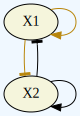

In [17]:
DSGRN.DrawGraph(network)

In [18]:
parameter_graph.size()

1600

In [19]:
param_stability = DSGRN_utils.StabilityQuery(network)

In [20]:
# query = GeneralHysteresisQuery(parameter_graph, 3, param_stability)
# query.find_shape_matches()

In [21]:
# query.multi_execute(4)

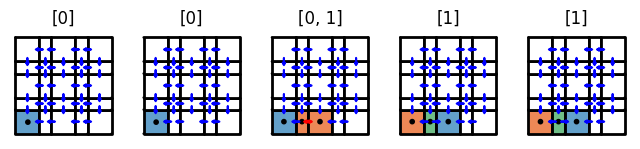

In [22]:
indices =  [0, 1]
start = top_cech_cell(parameter_graph, 1, 1)

parameter_complex, stg_dict = build_parameter_complex(parameter_graph, indices, dim=1)
shf = attractor_sheaf(parameter_complex, stg_dict)
shf_cohomology = sheaf_cohomology(shf)
section = shf_cohomology[0][0]

pcfig = PathSheafFigure(shf, stg_dict, parameter_graph)
pcfig.plot_bdry_cells = False
pcfig.plot()

In [23]:
cusp_query = CuspQuery(parameter_graph, param_stability)
cusp_results = cusp_query.multi_execute(processes=8)

Graph matching took 0.19 seconds. Found 210 graph matches.
Evaluating sheaf criteria. 100.0% complete.
Evaluating sheaf criteria took 4.86 seconds.

Found 72 matches!


In [24]:
isola_query = IsolaQuery(parameter_graph, param_stability)
isola_results = isola_query.multi_execute(processes=8)

Graph matching took 0.05 seconds. Found 406 graph matches.
Evaluating sheaf criteria. 100.0% complete.
Evaluating sheaf criteria took 9.42 seconds.

Found 138 matches!
